# DNA RL: Crossover based optimization algorithm N-actions Actor

Importing Libraries

In [1]:
import dna_env
import a2c
import torch
import variable as v
from tqdm import tqdm
from train_session import TrainSession
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

Initializing Environment

In [3]:
sequence_length = 36
render = True
state_representation = 'latent'
use_test_set = False
reward_func = 'binary' 
binary_reward_threshold = 0.45
action_constraints = {'co_length': (-1, 11),
                      'opt_start_point': (-1, 36),
                      'co_start_point': (-1, 36)}
early_stop_reward = {'reward_low_threshold': -1,
                     'reward_high_threshold': binary_reward_threshold,
                     'patience': 200}
env = dna_env.DnaRLEnv(action_constraints=action_constraints, 
                       early_stop_reward=early_stop_reward,
                       reward_func=reward_func,
                       binary_reward_threshold=binary_reward_threshold,
                       use_test_set=use_test_set,
                       sequence_length=sequence_length, 
                       state_representation=state_representation)
env.reset()
train_session = None

In [4]:
seed = 89 #345
state_dim = env.get_state_dim()
action_dim = env.get_action_dim()
print(f"state dim: {state_dim}")
print(f"action dim: {action_dim}")
print(f"test set length: {env.test_set_length}")

state dim: (400,)
action dim: (3, 36)
test set length: None


Creating our agents

###### N-Actions Actor base args

In [5]:
critic_init_1 = {
    'seed': seed,
    'action_dim': action_dim[0],
    'state_representation': state_representation,
    'network': {
        'i_size': state_dim[0],
        'l1_size': 200,
        'l2_size': 50,
               },
    'optimizer': {
        'lr': 1e-3
    }
}
actor_init_1 = {
    'entropy_learning_rate': 0.0,
    'seed': seed,
    'action_dim': action_dim[0],
    'state_representation': state_representation,
    'network': {
        'i_size': state_dim[0], 
        'l1_size': 300,
        'l2_size': 200,
        'o_size': sequence_length*3
               },
    'optimizer': {
        'lr': 1e-3
    }
}
n_actions_actor_init_1 = {
    'actor_type': 'actor_n_actions',
    'seed': seed,
    'discount_factor': 1.0, 
    'state_dim': state_dim, 
    'action_space': 3, 
    'actor': actor_init_1, 
    'critic': critic_init_1
}

###### N-Actions Actor

In [6]:
actor_init_2 = deepcopy(actor_init_1)
actor_init_3 = deepcopy(actor_init_1)
actor_init_4 = deepcopy(actor_init_1)

actor_init_2["entropy_learning_rate"] = 1e-4
actor_init_3["entropy_learning_rate"] = 1e-3
actor_init_4["entropy_learning_rate"] = 5e-2

n_actions_actor_init_2 = deepcopy(n_actions_actor_init_1)
n_actions_actor_init_3 = deepcopy(n_actions_actor_init_1)
n_actions_actor_init_4 = deepcopy(n_actions_actor_init_1)

n_actions_actor_init_2["actor"] = actor_init_2
n_actions_actor_init_3["actor"] = actor_init_3
n_actions_actor_init_4["actor"] = actor_init_4

In [8]:
if not train_session:
    print('Train Session reset')
    train_session = TrainSession({}, env, seed)

Train Session reset


In [9]:
agents_created = {
    #'N-Actions entropy : 0.0': a2c.A2C(n_actions_actor_init_1),
    #'N-Actions entropy : 1e-4': a2c.A2C(n_actions_actor_init_2),
    #'N-Actions entropy : 1e-3': a2c.A2C(n_actions_actor_init_3),
    'N-Actions entropy : 1e-2': a2c.A2C(n_actions_actor_init_4)
}
manual_agent_names = train_session.append_agents(agents_created)

In [10]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- N-Actions entropy : 1e-2


In [11]:
# train_session.load_model('a2c_agent', suffix='n_action-0801')

In [12]:
n_episode = 100
t_max_per_episode = 200
graphical = False

In [13]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=manual_agent_names)

100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


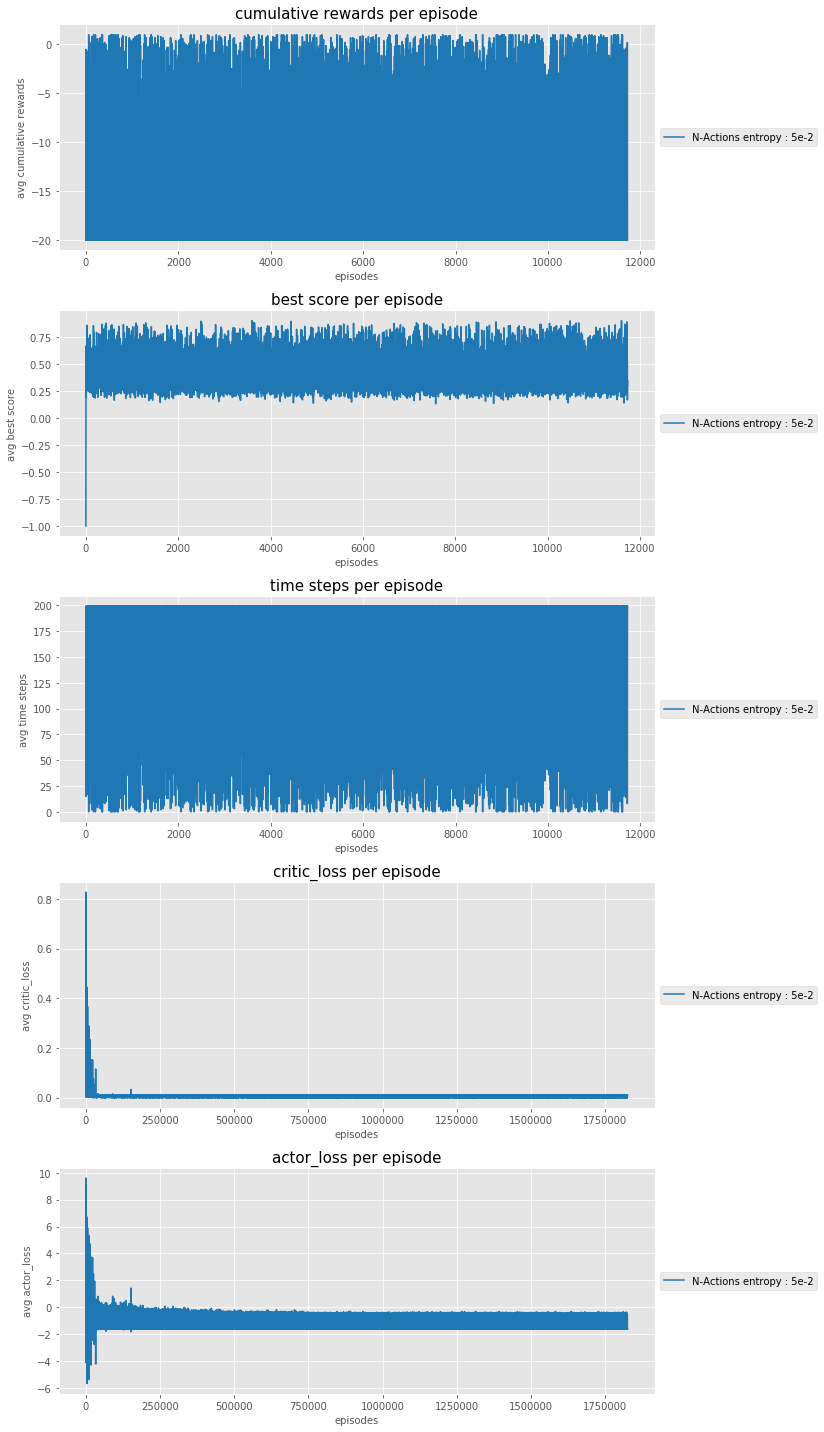

In [49]:
train_session.plot_results(window=1, agent_subset=manual_agent_names)

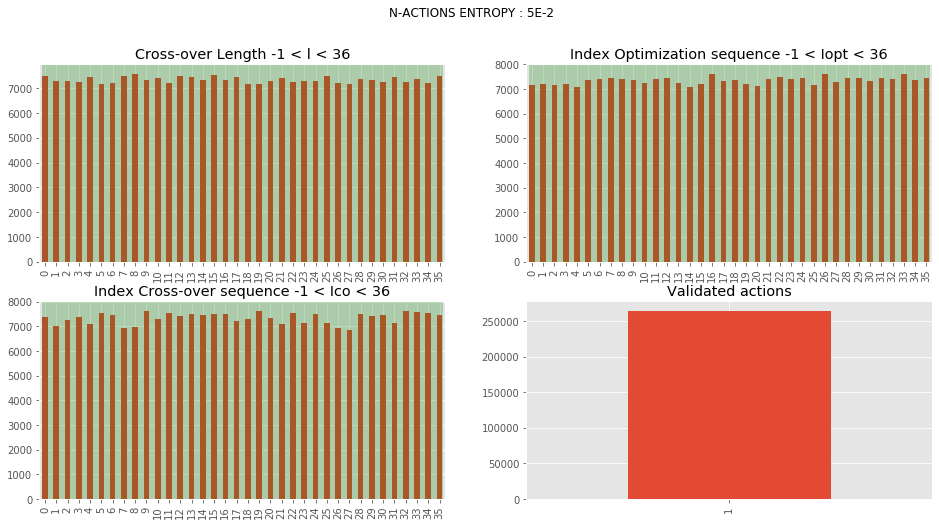

In [43]:
train_session.plot_actions_distributions()

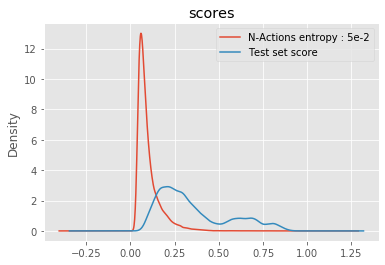

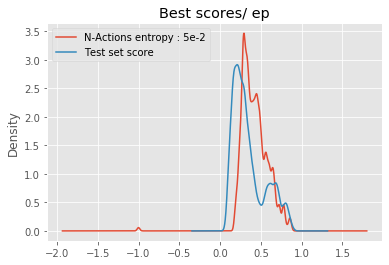

In [33]:
train_session.plot_density()